In [ ]:
from tool_class import Tool
f13_data = Tool.crawler('https://www.rocketfinancial.com/Holdings.aspx?fID=250')
f13_data.to_csv('lone_pine.csv', index=False)

In [1]:
import time
a = time.time()
import pandas as pd
import numpy as np

key = input('要爬蟲選1，預測投組選2: ')
if key == '1':
    from tool_class import Tool
    website = input('爬蟲網址 ex:https://www.rocketfinancial.com/Holdings.aspx?fID=250: ')
    f13_data = Tool.crawler(website)
    f13_data.to_csv('lone_pine.csv', index=False)
elif key == '2':
    import tool_class
    f13_data = pd.read_csv('lone_pine.csv')
    price_data = pd.read_csv('liquidity+highlow+class.csv', encoding='utf8', low_memory=False)
    industry = pd.read_csv('industry2.csv')
    asset = pd.read_csv('asset and book value.csv')

    date = input('本月月份(結果為預期下個月的投組): ')
    tool = tool_class.Tool(f13_data, price_data, industry, asset, date)

    feature_data = tool.training_set()

    testing_data = tool.testing_set()

    last_buy_count = len(feature_data[feature_data['buy']==1])
    not_buy_count = len(feature_data[feature_data['buy']==0])
    start = last_buy_count+1

    while start + last_buy_count * 4 < len(feature_data):
        t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:start+last_buy_count*2]])
        x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        y = t_data[['buy']].values
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        svc_clf = tool.svc_model(x, y)
        if svc_clf is not False:
            y_pred = svc_clf.predict(x_test)
            testing_data.loc[:, 'svc'] = y_pred
            testing_data = testing_data[testing_data['svc']==1]
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        rft_clf = tool.rft_model(x, y)
        if rft_clf is not False:
            y_pred = rft_clf.predict(x_test)
            testing_data.loc[:, 'rtf'] = y_pred
            testing_data = testing_data[testing_data['rtf']==1]
        start = start+last_buy_count*2

    t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:]])
    x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    y = t_data[['buy']].values
    x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    svc_clf = tool.svc_model(x, y)
    if svc_clf is not False:
        y_pred = svc_clf.predict(x_test)
        testing_data.loc[:, 'svc'] = y_pred
        testing_data = testing_data[testing_data['svc']==1]
    x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    rft_clf = tool.rft_model(x, y)
    if rft_clf is not False:
        y_pred = rft_clf.predict(x_test)
        testing_data.loc[:, 'rtf'] = y_pred
        testing_data = testing_data[testing_data['rtf']==1]

    print(list(testing_data['ticker']))
    
b = time.time()
print(b-a)

要爬蟲選1，預測投組選2: 2
本月月份(結果為預期下個月的投組): 201912


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


ValueError: '202001' is not in list

In [52]:
import time
import pandas as pd
import numpy as np
import tool_class
f13_data = pd.read_csv('lone_pine.csv')
price_data = pd.read_csv('liquidity+highlow+class.csv', encoding='utf8', low_memory=False)
industry = pd.read_csv('industry2.csv')
asset = pd.read_csv('asset and book value.csv')
our_revenue = []
intersection_revenue = []
lone_pine_revenue = []

for index in range(1, len(a_date)-1, 1):
    c = time.time()
    f13_data1 = f13_data.copy()
    price_data1 = price_data.copy()
    industry1 = industry.copy()
    asset1 = asset.copy()
    date = str(a_date[index])
    print(date)
    if int(date[4:]) == 1 or int(date[4:]) == 11:
        seanson_date = str(int(date[0:4])-1) + '12'
    elif int(date[4:]) == 4 or int(date[4:]) == 2:
        seanson_date = date[0:4] + '03'
    elif int(date[4:]) == 7 or int(date[4:]) == 5:
        seanson_date = date[0:4] + '06'
    elif int(date[4:]) == 10 or int(date[4:]) == 8:
        seanson_date = date[0:4] + '09'
    else:
        seanson_date = date
    tool = tool_class.Tool(f13_data1, price_data1, industry1, asset1, date)

    feature_data = tool.training_set()

    testing_data = tool.testing_set()

    last_buy_count = len(feature_data[feature_data['buy']==1])
    not_buy_count = len(feature_data[feature_data['buy']==0])
    start = last_buy_count+1

    while start + last_buy_count * 4 < len(feature_data):
        t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:start+last_buy_count*2]])
        x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        y = t_data[['buy']].values
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        svc_clf = tool.svc_model(x, y)
        if svc_clf is not False:
            y_pred = svc_clf.predict(x_test)
            testing_data.loc[:, 'svc'] = y_pred
            testing_data = testing_data[testing_data['svc']==1]
        x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
        rft_clf = tool.rft_model(x, y)
        if rft_clf is not False:
            y_pred = rft_clf.predict(x_test)
            testing_data.loc[:, 'rtf'] = y_pred
            testing_data = testing_data[testing_data['rtf']==1]
        start = start+last_buy_count*2

    t_data = pd.concat([feature_data[:last_buy_count],feature_data[start:]])
    x = t_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    y = t_data[['buy']].values
    x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    svc_clf = tool.svc_model(x, y)
    if svc_clf is not False:
        y_pred = svc_clf.predict(x_test)
        testing_data.loc[:, 'svc'] = y_pred
        testing_data = testing_data[testing_data['svc']==1]
    x_test = testing_data[['volatility', 'liquidity', '52 week high', 'momentum']].values
    rft_clf = tool.rft_model(x, y)
    if rft_clf is not False:
        y_pred = rft_clf.predict(x_test)
        testing_data.loc[:, 'rtf'] = y_pred
        testing_data = testing_data[testing_data['rtf']==1]

    test = tool.price_data.merge(testing_data[['ticker', 'class']], left_on=['Ticker', 'Class'], right_on=['ticker', 'class'])
    our_revenue.append(sum(test[test['Date']==str(a_date[index+1])]['PRC'])/sum(test[test['Date']==date]['PRC']))

    a=list(set(list(tool.f13_data[tool.f13_data['Date']==seanson_date]['Ticker'])).intersection(set(list(testing_data['ticker']))))
    intersection_revenue.append(sum(test[test['Date']==str(a_date[index+1])].loc[test['Ticker'].isin(a)]['PRC'])\
                                /sum(test[test['Date']==date].loc[test['Ticker'].isin(a)]['PRC']))

    def abcd(df_col):
        if df_col == 'A':
            return df_col
        else:
            return 0
    tdf = tool.f13_data[tool.f13_data['Date']==seanson_date][['Ticker', 'Class']]
    tdf['Class'] = tdf['Class'].apply(abcd)
    test1 = tool.price_data.merge(tdf, on=['Ticker', 'Class'])
    lone_pine_revenue.append(sum(list(test1[test1['Date']==str(a_date[index+1])]['PRC'])) / sum(list(test1[test1['Date']==date]['PRC'])))
    
    b = time.time()
    print(b-c)

200501


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


146.35969042778015
200502


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


134.7120726108551
200503


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


742.8870639801025
200504


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


138.67974495887756
200505


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


120.91322803497314
200506


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


136.39433360099792
200507


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


112.79217052459717
200508


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


118.93751311302185
200509


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


123.21561431884766
200510


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


123.76398706436157
200511


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


125.68085312843323
200512


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


123.26224398612976
200601


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


123.2519280910492
200602


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


129.5134253501892
200603


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


135.9509334564209
200604


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


132.99927949905396
200605


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


139.55188179016113
200606


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


179.58927631378174
200607


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


213.5176990032196
200608


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


212.11504220962524
200609


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


212.94689345359802
200610


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


239.48969912528992
200611


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


231.55256628990173
200612


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


211.79439425468445
200701


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


183.0216188430786
200702


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


178.0899782180786
200703


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


176.4172215461731
200704


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


165.95272421836853
200705


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


145.69022154808044
200706


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


169.09488892555237
200707


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


165.94638776779175
200708


C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\wells\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


KeyboardInterrupt: 

In [7]:
feature_data

,ticker,class,buy,volatility,liquidity,52 week high,momentum
0,ADBE,0,1,446834.0,0.923060,1.517206,1.066516
1,ADSK,0,1,288294.0,1.310231,1.528905,1.052335
2,AMZN,0,1,520498.0,1.049821,1.503758,1.012826
3,ATVI,0,1,1454403.0,1.893113,1.405136,1.140183
4,BKNG,0,1,88302.0,2.109662,1.284885,1.070662
5,CHWY,A,1,387454.0,7.245517,1.688206,0.844620
6,COUP,0,1,271325.0,4.252810,2.899945,1.274989
7,CRM,0,1,923739.0,1.053294,1.375999,1.031456
8,CSX,0,1,591653.0,0.756264,1.370320,0.994820
9,DHI,0,1,1062117.0,2.882326,1.680522,1.198198


In [5]:
testing_data

,ticker,class,volatility,liquidity,52 week high,momentum,svc,rtf
2,AAPL,0,5984993.0,1.346981,2.065194,1.315324,1,1
3,ABB,0,452038.0,3.003315,1.347680,1.143237,1,1
4,ABBV,0,1420757.0,0.960736,1.441569,1.133764,1,1
6,ABT,0,844768.0,0.477687,1.340079,1.052446,1,1
9,ADBE,0,510246.0,1.054055,1.535466,1.125433,1,1
29,AMAT,0,1314052.0,1.434555,1.976855,1.262543,1,1
35,AMZN,0,687587.0,1.386832,1.347075,1.016390,1,1
56,ATUS,A,817627.0,1.814670,1.846379,1.052890,1,1
57,ATVI,0,1015870.0,1.322300,1.481426,1.149724,1,1
64,AVGO,0,516367.0,1.297405,1.419293,1.091306,1,1


In [30]:
test = tool.price_data.merge(testing_data[['ticker', 'class']], left_on=['Ticker', 'Class'], right_on=['ticker', 'class'])
sum(test[test['Date']=='200501']['PRC'])/sum(test[test['Date']=='200412']['PRC'])

0.9491236965583735

In [103]:
len(list(tool.f13_data[tool.f13_data['Date']=='201903']['Ticker']))

32

In [39]:
a=list(set(list(tool.f13_data[tool.f13_data['Date']=='200502']['Ticker'])).intersection(set(list(testing_data['ticker']))))

In [40]:
sum(test[test['Date']=='200502'].loc[test['Ticker'].isin(a)]['PRC'])/sum(test[test['Date']=='200501'].loc[test['Ticker'].isin(a)]['PRC'])

ZeroDivisionError: division by zero

In [41]:
tool.f13_data[tool.f13_data['Date']==]['Ticker']

Series([], Name: Ticker, dtype: object)

In [35]:
test[test['Date']=='200501']

,Date,Ticker,Class,BIDLO,ASKHI,PRC,VOL,SHROUT,ticker,class
13,200501,AAPL,0,63.29,76.90,76.90,4597442.0,408586.0,AAPL,0
206,200501,AMGN,0,61.30,64.87,62.24,1622745.0,1260000.0,AMGN,0
399,200501,BEAS,0,7.98,8.79,8.52,1673481.0,398091.0,BEAS,0
451,200501,BRCD,0,5.83,7.46,6.20,1574358.0,268220.0,BRCD,0
618,200501,CHTR,A,1.61,2.30,1.61,3064846.0,304796.0,CHTR,A
794,200501,CSCO,0,17.51,19.32,18.04,13288037.0,6481000.0,CSCO,0
987,200501,DELL,0,40.00,41.79,41.76,2676671.0,2485000.0,DELL,0
1105,200501,EBAY,0,80.04,114.11,81.50,4491135.0,669304.0,EBAY,0
1298,200501,EMC,0,12.48,14.73,13.10,3201253.0,2396279.0,EMC,0
1451,200501,GLW,0,10.74,12.23,10.94,2032183.0,1402239.0,GLW,0


In [11]:
def abcd(df_col):
    if df_col == 'A':
        return df_col
    else:
        return 0
tdf = tool.f13_data[tool.f13_data['Date']=='201912'][['Ticker', 'Class']]
tdf['Class'] = tdf['Class'].apply(abcd)

In [12]:
test1 = tool.price_data.merge(tdf, on=['Ticker', 'Class'])
sum(list(test1[test1['Date']=='201912']['PRC'])) / sum(list(test1[test1['Date']=='201911']['PRC']))

1.0346402831200427

In [23]:
a_date = sorted(list(set(tool.price_data['Date'].astype('int'))))[12:]

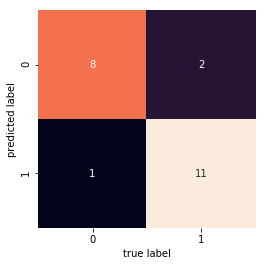

In [55]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')